#### ASSIGNMENT 1 OF 2023 BY GEORGIOS BILIAS (3200278) IN APPLIED MACHINE LEARNING

### SETUP FOR THE ASSIGNMENT 

 * I start this project by importing all the packages that I'll probably need. These are:

     * [NumPy](https://www.numpy.org/)
        
        This package will be used to perform some calculations
   
     * [pandas](https://pandas.pydata.org/)

        This package will be used to import the csv files but also manipulate them, create new Dataframes, etc.
   
     * [matplotlib](https://matplotlib.org/)

        This package will be mostly used for the plots and graphs that I have to do for some of the questions

     * [folium](https://python-visualization.github.io/folium/latest/index.html)

        and last but not least I'll use folium for the visualisation in the last question, this package will help create the map, 
        the markers, the pop up, etc.
 
 * Since I'm using the standard Python I had to manually install these packages:

      So, I went ahead to the cmd and ran the commands below:

      * `pip install numpy`

      * `pip install pandas`

      * `pip install matplotlib`

      * `pip install folium`


In [2]:
# importing all the packages that I'll need

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

## Q1: Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

Firstly,for this question I need a csv that contains each listing with its neighbourhood, so I'll go ahead and choose the `listings.csv` and read it
by using the `read_csv()` function in pandas

In [3]:
# read the listings.csv
listings_df = pd.read_csv('listings.csv')

and now I have saved this dataframe :

In [4]:
# display the listings_df as a table
listings_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080


I separate the values by neighbourhood with the use of the `listings_df['neighbourhood']`. This basically chooses the neighbourhood
column from the dataframe

In [5]:
neighbourhoods = listings_df['neighbourhood']
display(neighbourhoods)

0            ΑΜΠΕΛΟΚΗΠΟΙ
1            ΑΜΠΕΛΟΚΗΠΟΙ
2            ΑΜΠΕΛΟΚΗΠΟΙ
3            ΑΜΠΕΛΟΚΗΠΟΙ
4            ΑΜΠΕΛΟΚΗΠΟΙ
              ...       
12950    ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ
12951            ΝΙΡΒΑΝΑ
12952            ΝΙΡΒΑΝΑ
12953            ΝΙΡΒΑΝΑ
12954              ΓΚΥΖΗ
Name: neighbourhood, Length: 12955, dtype: object

Now with the use of the `value_counts()` function I can basically count the number of occurrences of each unique neighbourhood.This returns the data
in descending order by default so there's no need to call any other method to sort it

In [6]:
# Number Of Listings For Each Neighbourhood
nolfen = listings_df['neighbourhood'].value_counts()
display(nolfen)

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕΔΙΟ ΑΡΕΩΣ     

and with the use of  the `reset_index()` function I reset the index to each of the data and therefore making it more accessible in order. Also, I
rename the dataframe columns to make it look a bit better and so the columns are named exactly of what they're showing. (that's optional)

In [7]:
number_of_listings_per_neighbourhood = listings_df['neighbourhood'].value_counts().reset_index()

number_of_listings_per_neighbourhood.columns = ['Neighbourhood', 'Number of Listings'] # We use this to rename the columns to make it look better

display(number_of_listings_per_neighbourhood)

,Neighbourhood,Number of Listings
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
2,ΝΕΟΣ ΚΟΣΜΟΣ,980
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
6,ΠΑΓΚΡΑΤΙ,511
7,ΑΜΠΕΛΟΚΗΠΟΙ,452
8,ΚΟΛΩΝΑΚΙ,425
9,ΑΚΡΟΠΟΛΗ,386


## Q2: Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

For this question I can, once again, use the listings.csv so I don't really have to read it again, as I have done that already above and saved it as
`listings_df`.

What I need to do is create a table with the median and mean price per neighbourhood, the standard deviation and number of listings
per neighbourhood as well. There's one simple way to do it. Firstly, to group the data by neighbourhood so I can do the needed calculations for each neighbourhood. So, I use the `groupby()` method. 

In [8]:
neighbourhood_stats = listings_df.groupby('neighbourhood')
display(neighbourhood_stats)

As we can see above, a dataframe GroupBy Object has been created. Now, the only thing I need to do is:

* Choose from which column the calculations will be taking place `(price)`

* By using aggregation (`agg()` function) to choose the calculations I want it to perform `(median,mean,std,count)`

In [9]:
neighbourhood_stats = listings_df.groupby('neighbourhood')['price'].agg(['median', 'mean', 'std', 'count'])
display(neighbourhood_stats)

,median,mean,std,count
neighbourhood,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,61.0,98.818182,92.281191,55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,41.5,43.736842,17.408734,38
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,58.0,78.155447,73.453460,817
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,45.0,53.202020,32.861484,99
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,50.0,79.934211,163.926596,76
ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
ΑΜΠΕΛΟΚΗΠΟΙ,58.0,66.915929,39.297399,452
ΑΝΩ ΚΥΨΕΛΗ,42.0,45.932773,23.316078,119
ΑΝΩ ΠΑΤΗΣΙΑ,48.0,56.078125,29.493774,64


Now, the only thing left to do is:
 
 * Sort the dataframe in descending order (with the use of the `sort_values()` function) 

 * Rename the columns for it to be more visually pleasing (optional)

In [10]:
neighbourhood_stats = neighbourhood_stats.sort_values(by='median', ascending=False) # sorting the data by median 

neighbourhood_stats.columns = ['Median Price', 'Mean Price', 'Standard Deviation','Number of Listings'] # rename the columns

display(neighbourhood_stats)

,Median Price,Mean Price,Standard Deviation,Number of Listings
neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
ΖΑΠΠΕΙΟ,114.0,224.068323,641.163173,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.650662,229.183015,2416
ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162


## Q3: Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

For this question, I will be using the calendar.csv. That's because this csv file gives me info about the availability of each listing 
(`available` column), for every day.

So, the first thing I need to do is, once again, read the csv file by using the `read_csv()` function.

In [11]:
calendar_df = pd.read_csv('calendar.csv')
display(calendar_df)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,$18.00,$18.00,1,365
4728225,984289252638695828,2024-09-16,t,$16.00,$16.00,1,365
4728226,984289252638695828,2024-09-17,t,$16.00,$16.00,1,365
4728227,984289252638695828,2024-09-18,t,$16.00,$16.00,1,365


Since I need to calculate the availability per day, I will have to do 2 things:

 * Only select these data that have `available == t` (the ones that are available)

 * Group them by date (by using the `groupby()` function once again) and perform the `count()` function so I can have the number of listings that are available per day.

In [12]:
availability_per_day = calendar_df[calendar_df['available'] == 't'].groupby('date')['available'].count()
display(availability_per_day)

date
2023-09-21     540
2023-09-22     982
2023-09-23    1475
2023-09-24    2495
2023-09-25    3194
              ... 
2024-09-15    7532
2024-09-16    7535
2024-09-17    7532
2024-09-18    7537
2024-09-19    7555
Name: available, Length: 365, dtype: int64

As we can see the data are already in order so now I will start by using the `to_datetime()` function with the help of pandas to transform the dates to datetime for the sake of plotting.

In [13]:
availability_per_day.index = pd.to_datetime(availability_per_day.index)

And now there's only one thing left to do, to create the plot.

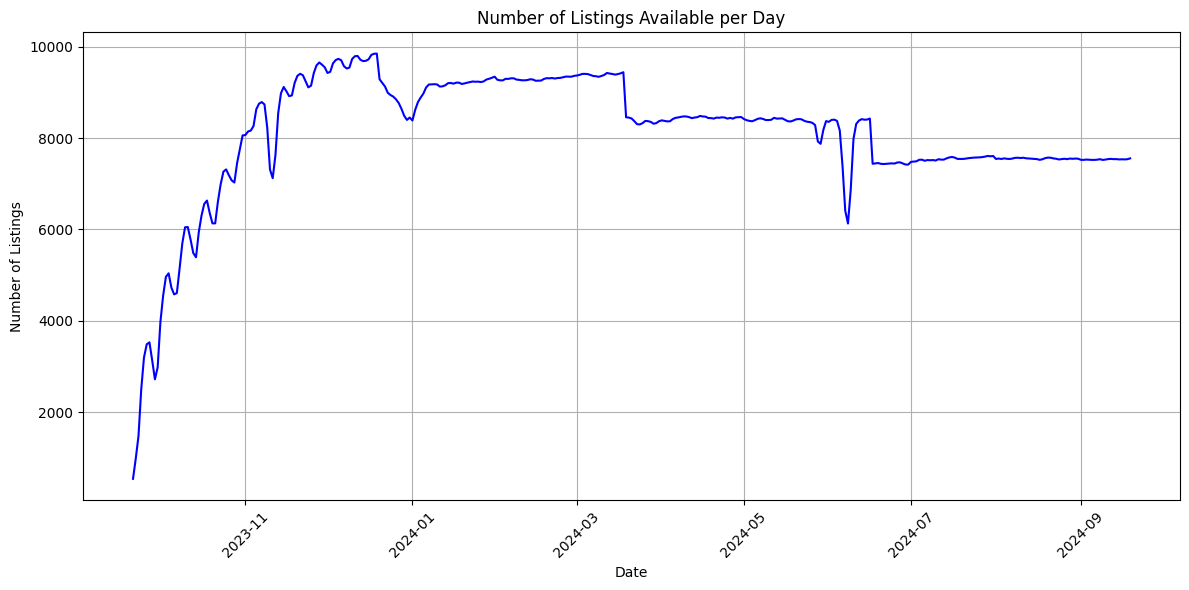

In [14]:
plt.figure(figsize=(12, 6)) # setting up the size of the plot
plt.plot(availability_per_day.index, availability_per_day.values,color='b') # choosing the x-axis and y-axis of the plot and the color as blue
plt.title('Number of Listings Available per Day') # choosing the title of the plot
plt.xlabel('Date') # choosing the name of the x-axis 
plt.ylabel('Number of Listings') # choosing the name of the y-axis

plt.grid(True) # allowing a grid on the bar plot

plt.xticks(rotation=45) # rotating the x-axis names 45 degrees so the dates will be readable

plt.tight_layout() # calling the tight_layout function because we need to fit in a lot of data

plt.show() # show the plot

## Q4: Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

First of all, for this question we will have to use the reviews csv so, the first thing we need to do is use the `read_csv()` function for pandas to read it.

First of all, for this question we will have to use the listings csv so we don't have to read it again, we have saved it as listings_df.

Now that we have have done that the next thing we need to do is calculate the minimum amount of reviews in a listing and the 
maximum reviews so we can use that for the bin. So, we are going to group by the reviews per listing, get their amount of reviews and then
calculate their max and min. That can be easily done by using the `value_counts()`(to get the number of reviews) and `min()`,`max()` functions (to keep the minimum and maximum out of those).

In [15]:
min_reviews = listings_df['number_of_reviews'].min()
print(min_reviews)
max_reviews = listings_df['number_of_reviews'].max()
print(max_reviews)

0
865


After we have calculated the stuff above, now what we have to do is calculate the bins for the histogram. And that's how we do it:

In [16]:
bins = np.arange(min_reviews, max_reviews + 1, 100)
print(bins)

[  0 100 200 300 400 500 600 700 800]


and, finally, now we can create the histogram.

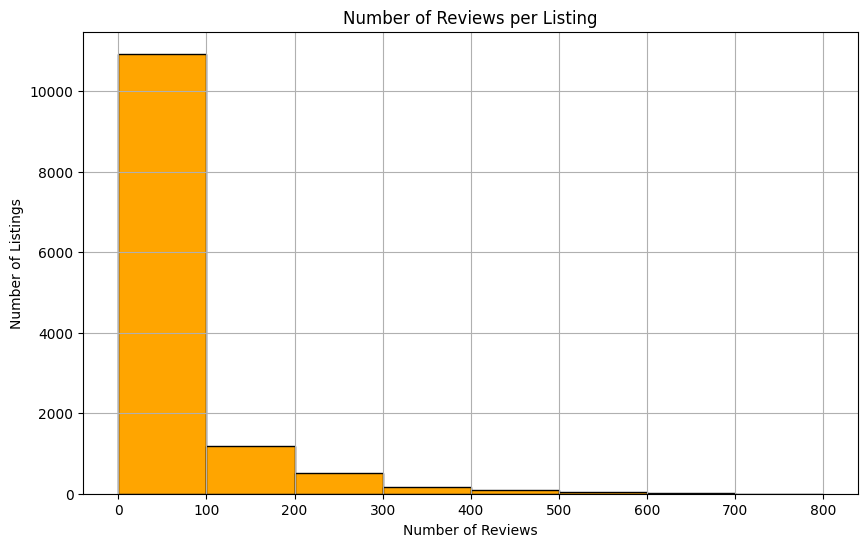

In [17]:

plt.figure(figsize=(10, 6)) # setting up the size of the histogram
#plt.hist(reviews_df['listing_id'].value_counts(), bins, edgecolor='black',color='orange') # setting up the values, bins and overall look of the histogram
plt.hist(listings_df['number_of_reviews'], bins, edgecolor='black',color='orange')
plt.title('Number of Reviews per Listing') # setting up the tile of the histogram
plt.xlabel('Number of Reviews') # setting up the x-axis name of the histogram
plt.ylabel('Number of Listings') # setting up the y-axis name of the histogram
plt.grid(True) # eanbling the grid for the histogram
plt.show() # printing the histogram

Now what I have to do is get the average reviews per month for each month and I fill the NaN with 0.

In [32]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
max_end_date = reviews_df['date'].max()
one_year_ago = max_end_date - pd.DateOffset(months=12)
last_12_months_data = reviews_df[reviews_df['date'] >= one_year_ago]
print(last_12_months_data)
reviews_per_listing = last_12_months_data.groupby('listing_id').count()
print(reviews_per_listing)
average_reviews_per_listing_per_month = reviews_per_listing / 12
print(average_reviews_per_listing_per_month)

                listing_id       date
34                   10595 2023-01-21
35                   10595 2023-02-03
36                   10595 2023-02-15
37                   10595 2023-02-17
38                   10595 2023-03-17
...                    ...        ...
630573  975966554881091774 2023-09-13
630574  976076532701121190 2023-09-16
630575  977373669051180593 2023-09-15
630576  977373669051180593 2023-09-20
630577  979596287508787842 2023-09-18

[177946 rows x 2 columns]
                    date
listing_id              
10595                 42
10990                 66
10993                 92
10995                 30
27262                 21
...                  ...
975413215364080586     4
975966554881091774     1
976076532701121190     1
977373669051180593     2
979596287508787842     1

[10999 rows x 1 columns]
                        date
listing_id                  
10595               3.500000
10990               5.500000
10993               7.666667
10995               2

In [ ]:
average_reviews_per_listing_per_month = listings_df[['id','reviews_per_month']].fillna(0)
print(average_reviews_per_listing_per_month)

                       id  reviews_per_month
0                   10595               0.28
1                   10990               0.49
2                   10993               0.69
3                   10995               0.19
4                   27262               0.16
...                   ...                ...
12950  983937080532919737               0.00
12951  984280014002068815               0.00
12952  984280014714317399               0.00
12953  984280015206592938               0.00
12954  984289252638695828               0.00

[12955 rows x 2 columns]


And now i will calculate the average occupancy per listing per month

In [ ]:
occupancy_percentage = 0.5 # set the occupancy percentage
average_occupancy_per_listing_per_month = average_reviews_per_listing_per_month.rename(columns={'reviews_per_month':'average_occupancy_per_month'}) # create the df
average_occupancy_per_listing_per_month['average_occupancy_per_month'] = average_occupancy_per_listing_per_month['average_occupancy_per_month'] / occupancy_percentage # set the occupancy
display(average_occupancy_per_listing_per_month)

,id,average_occupancy_per_month
0,10595,0.56
1,10990,0.98
2,10993,1.38
3,10995,0.38
4,27262,0.32
...,...,...
12950,983937080532919737,0.00
12951,984280014002068815,0.00
12952,984280014714317399,0.00
12953,984280015206592938,0.00


And now all we need to do is calculate the average price by using mean() across all listings and the average income per month per listing.
We will create a dataframe so we can keep the id and occupancy per listing as columns and as well add the average_income_per_month in each listing by doing the
appropriate calculations.

In [ ]:
average_price = listings_df['price'].mean()
print(average_price)

average_income_per_listing_per_month = average_occupancy_per_listing_per_month.merge(pd.DataFrame({'id': average_occupancy_per_listing_per_month['id'],
                                                                            'average_income_per_month': average_price * average_occupancy_per_listing_per_month['average_occupancy_per_month'] * 3}), on='id')
display(average_income_per_listing_per_month)

110.45858741798533


,id,average_occupancy_per_month,average_income_per_month
0,10595,0.56,185.570427
1,10990,0.98,324.748247
2,10993,1.38,457.298552
3,10995,0.38,125.922790
4,27262,0.32,106.040244
...,...,...,...
12950,983937080532919737,0.00,0.000000
12951,984280014002068815,0.00,0.000000
12952,984280014714317399,0.00,0.000000
12953,984280015206592938,0.00,0.000000


And now we will sum these all up to get the average income per month across all listings.Also, we will use the mean to get the average of all the listings.

In [ ]:
total_average_income_per_month = average_income_per_listing_per_month['average_income_per_month'].sum()
print(f'Total Average Income per month across all listings: {total_average_income_per_month: .2f}')
mean_average_income_per_month = average_income_per_listing_per_month['average_income_per_month'].mean()
print(f'Mean Average Income per month across all listings: {mean_average_income_per_month: .2f}')

Total Average Income per month across all listings:  13090462.66
Mean Average Income per month across all listings:  1010.46


## Q5: Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

For this question, I will be using the listings csv so I don't need to read it as it's already read and saved as listings_df.

The first thing I need to do is choose the `room_type` column from the listings csv and then then once again perform the `value_counts()` function to
get the number of listings per Room Type

In [ ]:
room_type_counts = listings_df['room_type'].value_counts()
display(room_type_counts)

Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: room_type, dtype: int64

Then I calculate the summary of all the listings so I can get the percentages.

In [ ]:
total_listings = room_type_counts.sum()
display(total_listings)

12955

And then I divide the total_listings from the room_type_counts and multiply the result with 100 to come up with the percentages. I also use
the lambda function to keep only 2 decimal digits and the % string for it to be more presentable. (that's optional of course)

In [ ]:
room_type_percentages = (room_type_counts / total_listings) * 100
display(room_type_percentages) # all decimals
room_type_percentages = room_type_percentages.apply(lambda x: f'{x:.2f}%')
display(room_type_percentages) # 2 decimals

Entire home/apt    89.942107
Private room        8.591277
Hotel room          0.810498
Shared room         0.656117
Name: room_type, dtype: float64

Entire home/apt    89.94%
Private room        8.59%
Hotel room          0.81%
Shared room         0.66%
Name: room_type, dtype: object

Then, I create a dataframe for all of these so I can have them all together.

In [ ]:
room_type_summary = pd.DataFrame({
    'Room Type': room_type_counts.index,
    'Amount of Listings': room_type_counts.values,
    'Percentage': room_type_percentages.values
})
display(room_type_summary)

,Room Type,Amount of Listings,Percentage
0,Entire home/apt,11652,89.94%
1,Private room,1113,8.59%
2,Hotel room,105,0.81%
3,Shared room,85,0.66%


And last but not least I need to calculate the number of listings per neighbourhood and room_type.For that I will use `groupby()` for both of them and then I will use the `size()` function to get the number of listings per neighbourhood and room_type.

In [ ]:
neighbourhood_room_counts = listings_df.groupby(['neighbourhood', 'room_type']).size()
display(neighbourhood_room_counts)

neighbourhood                     room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt     33
                                  Private room         5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt    686
                                  Hotel room           4
                                                    ... 
ΣΤΑΔΙΟ                            Private room        11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   Entire home/apt     73
                                  Hotel room           4
                                  Private room         4
                                  Shared room          4
Length: 111, dtype: int64

Then I use the unstack() function to create the Dataframe for it with neighbourhood as the index and room type as the column and 
`fillna(0).astype(int)` to replace the values that are NaN to 0 as int. 

In [ ]:
neighbourhood_room_counts = neighbourhood_room_counts.unstack().fillna(0).astype(int)
display(neighbourhood_room_counts)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,55,0,0,0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,33,0,5,0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,686,4,117,10
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,91,0,8,0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,74,0,2,0
ΑΚΡΟΠΟΛΗ,360,6,20,0
ΑΜΠΕΛΟΚΗΠΟΙ,431,0,17,4
ΑΝΩ ΚΥΨΕΛΗ,103,0,16,0
ΑΝΩ ΠΑΤΗΣΙΑ,61,0,3,0


## Q6: Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

For this question I will use the calendar csv so I don't need to `read_csv()` as I have done it already and I have saved it as `calendar_df`

Since I have to use the `price` column for the question and do calculations with it but it is set as a string with the `$` and also `,` I will have to perform some string manipulations and also convert it into a number `(float)` first.

In [ ]:
print(calendar_df['price'])

0          $150.00
1          $150.00
2          $150.00
3          $150.00
4          $300.00
            ...   
4728224     $18.00
4728225     $16.00
4728226     $16.00
4728227     $16.00
4728228     $16.00
Name: price, Length: 4728229, dtype: object


What I basically need to do is replace the things mentioned above with `''` so they are going to be able to to get converted into a `float` number.

In [ ]:
calendar_df['price'] = calendar_df['price'].str.replace('[\$,]', '', regex=True).astype(float)

print(calendar_df['price'])

0          150.0
1          150.0
2          150.0
3          150.0
4          300.0
           ...  
4728224     18.0
4728225     16.0
4728226     16.0
4728227     16.0
4728228     16.0
Name: price, Length: 4728229, dtype: float64


Now I am able to perform any needed calculations.

The next thing needed to do is to calculate the mean price per listing per day. So, firstly, I'm going to groupby the data by the date and calculate the mean price so I can have the average mean price per day. This can be done by using the `groupby()` and `mean()` functions.

In [ ]:
average_price_per_day = calendar_df.groupby('date')['price'].mean()
display(average_price_per_day)

date
2023-09-21    113.107689
2023-09-22    116.212290
2023-09-23    116.264860
2023-09-24    113.045932
2023-09-25    111.629226
                 ...    
2024-09-15    110.923736
2024-09-16    110.402933
2024-09-17    110.385488
2024-09-18    110.298572
2024-09-19    110.255577
Name: price, Length: 365, dtype: float64

Then I made it into a dataframe by usind the `Dataframe` method by pandas.

In [ ]:
average_price_table = pd.DataFrame({'Date': average_price_per_day.index, 'Average Price': average_price_per_day.values})
display(average_price_table)

,Date,Average Price
0,2023-09-21,113.107689
1,2023-09-22,116.212290
2,2023-09-23,116.264860
3,2023-09-24,113.045932
4,2023-09-25,111.629226
...,...,...
360,2024-09-15,110.923736
361,2024-09-16,110.402933
362,2024-09-17,110.385488
363,2024-09-18,110.298572


Now the only thing left to do is to create the graph.

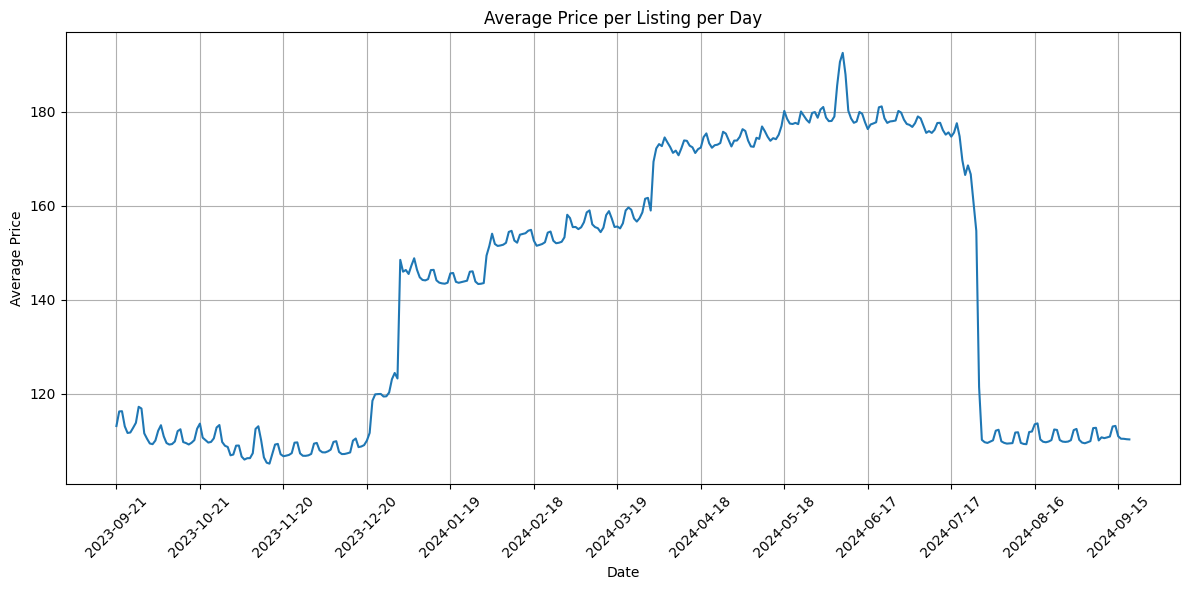

In [ ]:
plt.figure(figsize=(12, 6)) # setting up the plot size
plt.plot(average_price_table['Date'], average_price_table['Average Price']) # setting up the x-axis and y-axis
plt.title('Average Price per Listing per Day') # setting up the title for the plot
plt.xlabel('Date') # setting up the name of the x-axis
plt.ylabel('Average Price') # setting up the name of the y-axis
plt.grid(True) # allowing the grid to exist in the plot
plt.xticks(average_price_table['Date'][::30], rotation=45) # setting up the the dates to show in the plot every 30 days(~ 1 month) and I rotate them to be easily readable

plt.tight_layout() # since there is a lot of data we choose the tight layout
plt.show() # show the plot

## Q7: Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

First of all, for this question I will be using the listing csv but since it's already read and saved as `listings_df` I do not have to do it all over again.

The first thing I will do is group the listings by the host and by using the `agg()` function to get the name and amount of listings accordingly.
I will also rename the columns so it can be better visually and easier to recognize the values. (optional)

In [ ]:
host_listings = listings_df.groupby('host_id').agg({'host_name': 'first', 'id': 'count'}).reset_index()
display(host_listings)
host_listings.rename(columns={'host_id': 'Host ID', 'host_name': 'Host Name', 'id': 'Amount of Listings'}, inplace=True)
display(host_listings)

,host_id,host_name,id
0,1805,Stavros,1
1,37177,Emmanouil,7
2,70840,Amanda,1
3,102433,Pavlos,1
4,109363,Veroniki,1
...,...,...,...
5769,536958637,Ferik,1
5770,537287187,Pablo,1
5771,537356944,Γιαννης,1
5772,537542347,Efstathia,1


,Host ID,Host Name,Amount of Listings
0,1805,Stavros,1
1,37177,Emmanouil,7
2,70840,Amanda,1
3,102433,Pavlos,1
4,109363,Veroniki,1
...,...,...,...
5769,536958637,Ferik,1
5770,537287187,Pablo,1
5771,537356944,Γιαννης,1
5772,537542347,Efstathia,1


Now, it's time to sort the data in descending order based on the amount of listings but also to drop the index for better indexing in descending order.

In [ ]:
host_listings = host_listings.sort_values(by='Amount of Listings', ascending=False)
host_listings = host_listings.reset_index(drop=True)
display(host_listings)

,Host ID,Host Name,Amount of Listings
0,20104194,Upstreet,114
1,113548208,Mgv,88
2,90390850,Evan&Anetta,78
3,748818,George,74
4,47267002,Tèo,61
...,...,...,...
5769,130728079,Iro And Manos,1
5770,130646248,Fouad,1
5771,130612477,Δήμητρα,1
5772,130551473,Alex,1


And now for the final part I will make the 2 plots. One basic plot and one with the x-axis in logarithmic scale.
For the basic one I will just use the `plot()` function and for the logarithmic in x-axis the `semilogx()` function.

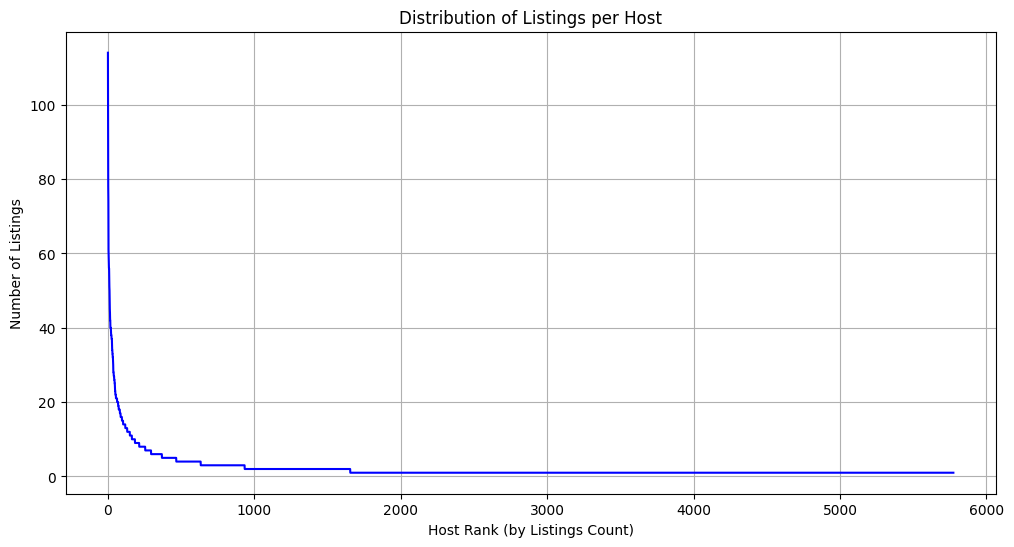

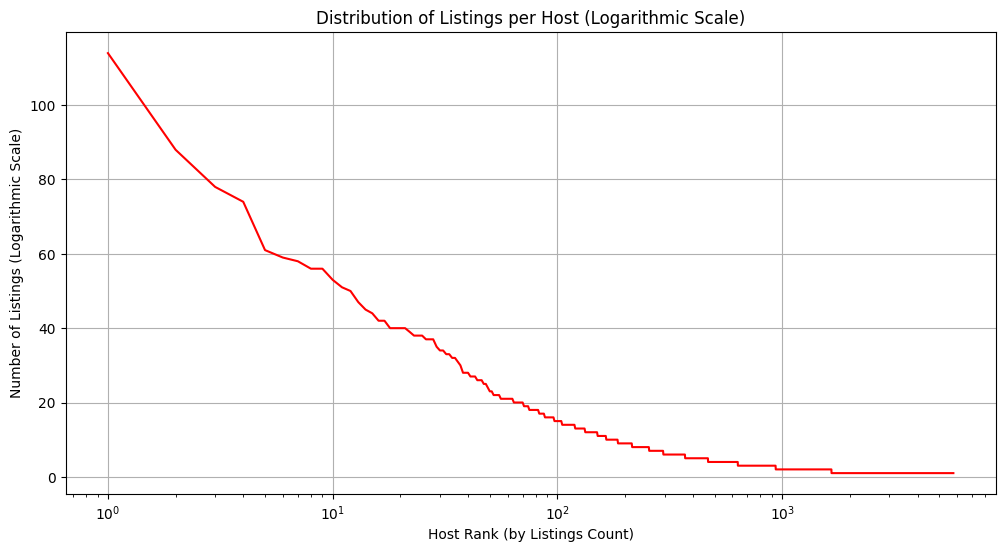

In [ ]:
plt.figure(figsize=(12, 6)) # setting up the size
plt.plot(range(1, len(host_listings) + 1), host_listings['Amount of Listings'], color='b', linestyle='-') # setting up the axis of the plot and look
plt.title('Distribution of Listings per Host') # naming the tile
plt.xlabel('Host Rank (by Listings Count)') # naming the x-axis
plt.ylabel('Number of Listings') # naming the y-axis
plt.grid(True) # setting the grid as on

plt.show() # printing the plot

plt.figure(figsize=(12, 6)) # setting up the size
plt.semilogx(range(1, len(host_listings) + 1), host_listings['Amount of Listings'], color='r', linestyle='-') # setting up the axis of the plot and look (log in x)
plt.title('Distribution of Listings per Host (Logarithmic Scale)') # naming the title
plt.xlabel('Host Rank (by Listings Count)') # naming the x-axis
plt.ylabel('Number of Listings (Logarithmic Scale)') # naming the y-axis
plt.grid(True) # setting the grid as on

plt.show() # printing the plot

## Q8: Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

First of all, I need to import a specific plugin from folium for the MarkerCluster that I will need.

In [ ]:
from folium.plugins import MarkerCluster

Now that I have done that, what I need to do is read the listings_detailed csv from listings.csv.gz since the other listings.csv doesn't have any
description or other data that I need for the visualisation.

In [ ]:
listings_detailed_df = pd.read_csv('listings_detailed.csv')

Because some of the data are NaN and I do not want them to show like that in the pop-up I will just replace them with an empty string.(will use if statements when needed later)

In [ ]:
listings_detailed_df = listings_detailed_df.fillna('')

Because some stuff that are included in the description can ruin my html code in it, I will have to use some string manipulation to replace them with `''` so they'll go away without causing any issues to our code.

In [ ]:
listings_detailed_df['description'] = listings_detailed_df['description'].str.replace(r'[^\w\s.,!?<>\'α-ωΑ-Ω]', '', regex=True)

Now what I will do is create the map with the help of folium. I will choose the centre of athens as the spawn of the map (using lat and lon)
and as I have been advised, I'll set the zoom between 12 and 15.

In [ ]:
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12,zoom_end=15)

and now I will initialize the Marker Cluster for the map.

In [ ]:
marker_cluster = MarkerCluster().add_to(athens_map)

Now that I have done that, its time to read every listing from the csv, create its pop-up content and add it to the marker cluster. I use the 
`lazy=True` because I have too many data to load (especially pictures) so this helps by only loading pictures and heavy in load stuff only when we click on their marker. The last thing I do is saving the map as an html file so we can view it in web locally.

In [ ]:
for index, row in listings_detailed_df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    name = row['name']
    property_type = row['property_type']
    price = row['price']
    listing_url = row['listing_url']
    neighbourhood = row['neighbourhood']
    neighbourhood_cleansed = row['neighbourhood_cleansed']
    picture_url = row['picture_url']
    description = row['description']
    host_name = row['host_name']
    host_thumbnail_url = row['host_thumbnail_url']
    host_url = row['host_url']
    host_location = row['host_location']
    host_since = row['host_since']
    host_response_time = row['host_response_time']
    
    popup_content = f'<div style="max-width: 500px; padding: 10px;">' \
               f'<a href="{listing_url}"><h4>{name}</h4></a>' \
               f'<div style="display: flex;">' \
               f'<div style="float: left;">' \
               f'<img src="{picture_url}" alt="Listing Image" ' \
               f'style="max-width: 80%; height: auto; max-height: 200px; border-radius: 10px;"><br>' \
               f'</div>' \
               f'<div style="float: right; margin-left: 10px;">' \
               f'<img src="{host_thumbnail_url}" alt="Host Image" ' \
               f'style="max-width: auto; height: auto; max-height: auto; border-radius: 10px;">' \
               f'<p><strong>Host: </strong><a href="{host_url}">{host_name}</a></p>' \
               f'<p><strong>{host_location}</strong></p>' \
               f'<p><strong>Host since: {host_since}</strong></p>' \
               f'<p>{"<strong>Response Time: </strong><br>"+host_response_time if host_response_time !="" else"" }</p>' \
               f'</div>' \
               f'</div>' \
               f'<p><strong>Neighbourhood:</strong> {neighbourhood_cleansed}{", " + neighbourhood if neighbourhood !="" else ""}</p>' \
               f'<p><strong>Property Type:</strong> {property_type}</p>' \
               f'<p><strong>Description:</strong></p>' \
               f'<p>{description}</p>' \
               f'<p><strong><h3>Price:</strong>{price}</h3></p>' \
               f'</div>'

    html = folium.Html(popup_content, script=True)
    marker = folium.Marker(
        location=[latitude, longitude],
        popup = folium.Popup(html,max_width=600, lazy=True)
        ).add_to(marker_cluster)

athens_map.save("athens_listings_map.html")
